# MT3510 Statistics Project

For the individual statsitics project, you will develop a statistical approach to analysing properties of tennis games.
    
## Getting help

Questions and queries are permitted, within reason, and can be directed to Dr Swallow or lab demonstrators. Help will also be available in the Friday 1pm drop-in sessions in Wks 8 and 9. The preferred route of contact for outside the lab is email (bts3@).

## Submitting the project

Submission deadline is 5pm Friday 22nd March via MySaint/MMS.

Use the cells provided to write the necessary code and (you should not need any additional cells). Submit a single .ipynb Notebook file (as with the tutorials).

Late submissions will be dealt with using the standard policy (see [here](https://www.st-andrews.ac.uk/mathematics-statistics/students/taught-modules/late-work/)).

## Marking breakdown

| Code  (70%)                   | Written Answers (30%) |
| --------------------------- | ------------------- |
| Correct results (50%)         | Accuracy (20%)        |
| Readability and style (20%)   | Conciseness (10%)     |

# Background

## A random game of tennis

Consider a game of tennis between two players, A and B. Assume that the players have reached deuce, that is 40-40. From this point in the game, the game can move either to $X_{k+1}$ or to $X_{k-1}$, where $k$ is the current state of the match.

$$
X_0: Player\ A\ wins\\
X_1: Advantage\ player\ A\\
X_2: Deuce\\
X_3: Advantage\ player\ B\\
X_4: Player\ B\ wins
$$

If the game reaches state $k=0$ or $k=4$, the game ends and the winner is noted. If player A has a constant probability $p$ of winning a point within a game, that is the game moving from $X_k$ to $X_{k-1}$, what is the probability of moving from state $X_k$ to $X_{k+1}$?

## Jackknife

The jackknife procedure is another computer intensive method used for variance and bias estimation (it pre-dates the bootstrap method covered in lectures), developed in the 1950s from an idea by [Maurice Quenouille](https://rss.onlinelibrary.wiley.com/doi/10.1111/j.2397-2327.1977.tb03870.x). Whilst in bootstrapping, the observed data is sampled with replacement in order to simulate the sampling process, in the jackknife method, each sample consists of all but one of the observations, sampled *without* replacement. More details can be found [here](http://people.bu.edu/aimcinto/jackknife.pdf).

Assuming the observed data is of size $n$, $n$ plausible samples are generated from the observed data, each having sequentially a single data point removed, i.e. the first jackknife sample is of length $n-1$ with the first data point removed, the second jackknife sample is also of length $n-1$ with only the second data point removed, etc.

The collection of jackknife samples can then be used to compute a statistic of interest, albeit not necessarily in the straightforward manner of the bootstrap. For example, the jackknife estimate of the standard error (SE) of the mean is given by:

$$ SE = \sqrt {\frac{n-1}{n} \sum_{i=1}^{n}(\theta_i-\bar{x})^2} $$

where: 

* $n$ is the sample size
* $\bar{x}$ is the mean of the original sample
* $\theta_i$ is the mean of the $i^{\text{th}}$ jackknife sample

# Assessment

## Part 1

1) Write a python function called `tennissim` that takes as input the probability of player A winning the next point and then generates the sequence of $k$ for a single random game starting at $k=2$. It should return the sequence of $k$s as a `numpy` array **after** the starting point (i.e. remove the initial 2).

Next we will use this function to study a couple of different properties of the tennis game, namely the duration of the game and the probability that player A goes on to win.

2) Assuming $p=0.7$, simulate a sequence of values $n_i$ between 100 and 10,000, separated by 500. That is, $n_i\in [100,600,1100,...]$. For each of these $n_i$, simulate $n_i$ random games using your `tennissim` function, and for each game store the duration of the game, excluding the initial starting state $k=2$, and the overall winner of the game.

3) Plot a figure with two subfigures, the left-hand one showing a scatterplot of all simulated durations of the game (y-axis) for each value of $n_i$ (x-axis). The right-hand subfigure should be a scatterplot of all estimated probabilities that player A wins the game (y-axis) for each value of $n_i$ (x-axis). Add additional points in a different coulour to each subfigure to show the mean values of each statistic for each $n_i$. Ensure appropriate titles, axis labels and layouts are used.

Text(0, 0.5, 'Estimated probability of player A winning a simulated game')

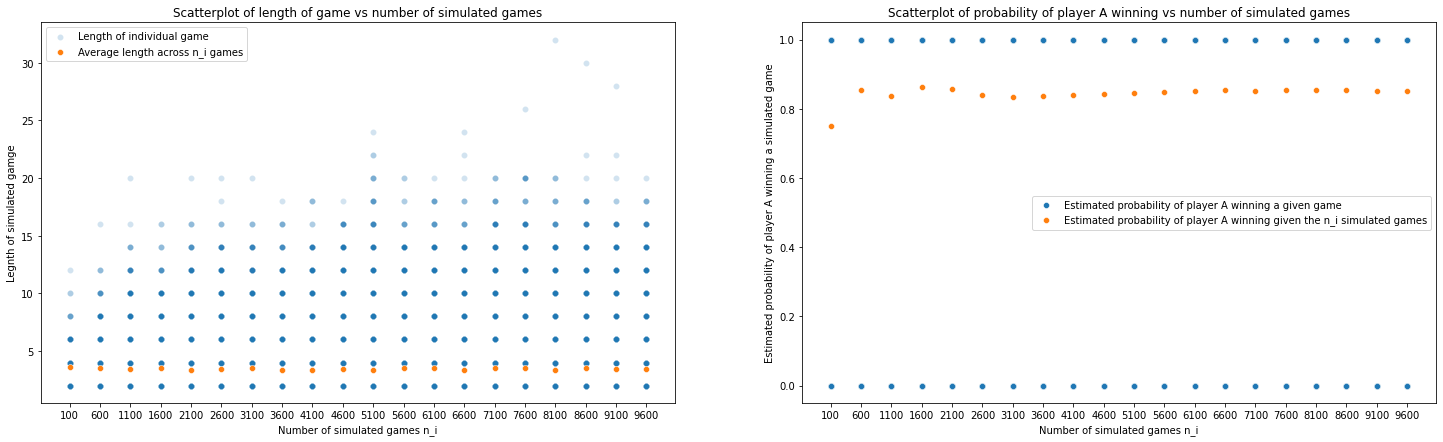

In [183]:
# Your code here
import numpy as np
# 1
def tennissim(p): 
    list = [2] #start with k=2
    while not (list[-1] == 0 or list[-1] == 4): #while we have not reached the end of the game
        if (np.random.binomial(1,p) == 1): #one bernoulli trial with prbability of success p. If its a success:
            list.append(list[-1]-1) #append k_n - 1 where k_n is the state we were in before 
        else: #if it's not a success:
            list.append(list[-1]+1) #append k_n + 1 where k_n is the state we were in before 
    list.pop(0) #At the very end remove the first element (2) and return a numpy array
    return np.array(list)

# 2
lengths = [] 
winners = []
factorised_winners = [] #this is to make graphing the probabilities easier, 1 represents a win from player A, 0 represents a win from player B.
for i in range(100, 10001, 500): #for each n_i
    for n in range(i): #simuli n_i games
        game = tennissim(0.7)
        lengths.append(len(game)) #store the length of the game
        if (game[-1] == 0): #store the winner of the game.
            winners.append('A')
            factorised_winners.append(1)
        if (game[-1] == 4):
            winners.append('B')
            factorised_winners.append(0)

# 3
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

x = []
for i in range(100, 10001, 500): #so we have a pair of values for each game. Pairs for each n_i will might be plotted on top of each other.
    x += list(np.repeat(i,i))

x1 = np.arange(100, 10001, 500) #for the averages we don't need pairs for each game but just one value for each n_i


#plotting the left graph
average_length = [] # this will store the mean lengths for each game
prev_i = 0 
for i in range(100, 10001, 500):
    average_length.append(np.array(lengths[prev_i:i]).mean()) #we are only interested in the games that belong to batch n_i
    prev_i = i

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 7))
sb.scatterplot(x=x, y = lengths, ax=ax1, label='Length of individual game', alpha=0.2) #we are setting the opacity as some pairs will be plotted on top of each other 
sb.scatterplot(x=x1, y = average_length, ax=ax1, label='Average length across n_i games')
ax1.set(title='Scatterplot of length of game vs number of simulated games')
x_ticks = np.arange(100,10001,500) #setting the x_ticks to be n_i
ax1.set_xticks(x_ticks)
ax1.legend()
ax1.set_xlabel('Number of simulated games n_i')
ax1.set_ylabel('Legnth of simulated gamge')



#plotting the right graph
average_wins = [] #this will store probabilities of player A winning a game 
prev_i = 0 
for i in x1:
    a = np.array(winners[prev_i:prev_i+i]) #we are only interested in the games that belong to batch n_i
    A_wins = np.count_nonzero(a=='A') #count the number of occurences of A in batch n_i
    average_length.append(A_wins/i) #then divide by the number of games in batch n_i and store the result
    prev_i = i

sb.scatterplot(x=x, y = factorised_winners, ax =ax2, label='Estimated probability of player A winning a given game') #we are using factorised winners because an entry of 1 indicates that player A won the game
sb.scatterplot(x=x1, y = average_wins, ax =ax2, label='Estimated probability of player A winning given the n_i simulated games')
ax2.set(title='Scatterplot of probability of player A winning vs number of simulated games')
ax2.set_xticks(x_ticks) #setting the x_ticks to be n_i
ax2.set_xlabel('Number of simulated games n_i')
ax2.set_ylabel('Estimated probability of player A winning a simulated game')

In [167]:
# Don't edit this cell
if not "tennissim" in globals():
    raise NotImplementedError("tennissim() has not been defined in Part 1")

## Part 2

In the provided data file `tennisgames.csv`, the historical data of recent games between Andrew Federer and Roger Murray are provided, showing for games that reached deuce, how long after that point the game lasted and who went on to win.

1) Import the data into a Pandas dataframe.

2) Write a function called `jackknife(df)` which takes as input a `Pandas` dataframe `df` with two columns. For the two columns, namely the game duration and the probability of player Andrew winning, calculate an estimate of the jackknife standard error using the formula above and save these as two floats `sedur` and `seprob` respectively. [$\bar{x}$ will be either the average duration or average probability from each sample of the original data column.]

3. Write a short description (no more than 300 words) of how you could use these jackknife standard errors and your results from Part 1 above to suggest whether it is likely Andrew Federer's probability of beating Roger Murray is close to 0.7 or not. Complete this as a comment in the final box below.

In [190]:
# Your code here
#1
import pandas as pd
tennisgames = pd.read_csv('tennisgames.csv') #read the file as a dataframe

def jackknife(df):
    n = len(df)
    jack_mean_durations = []
    mean_duration = df.iloc[:,0].mean() #take the mean of the first column (which we assume stores the duration of the game), this is the mean of the original sample of the duration of a game
    jack_mean_probs = []
    total_wins = df.iloc[:,1].value_counts()['AF'] #find the total number of times AF won and divide by the number of rows, this is the mean of the original sample of the probabilities that AF wins a game
    mean_prob = total_wins/n
    
    for i in range(n):
        jackknifedf = df.drop(i, axis = 0) #drop the ith row
        jack_mean_durations.append(jackknifedf.iloc[:,0].mean()) #find the mean duration for the remaining games
        wins = (jackknifedf.iloc[:,1].value_counts()['AF']) #find the mean probability of AF winning for the remaning games
        jack_mean_probs.append(wins/(n-1)) 
    sq_durations_diff = (np.array(jack_mean_durations) - np.array(mean_duration))**2 #take the difference between each jackknife duration  sample mean and the original sample mean and square it
    sq_probs_diff = (np.array(jack_mean_probs) - np.array(mean_prob))**2 #take the difference between each jackknife probability sample mean and the original sample mean and square it
    sedur = np.sqrt(((n-1)/n)*np.sum(sq_durations_diff)) #take the sum of the difference array, multiply by (n-1)/n), and finally take the square root. 
    seprob = np.sqrt(((n-1)/n)*np.sum(sq_probs_diff))
    return [sedur, seprob]

print(f'the jackknife estimate for the standard error of the duration of a game is {jackknife(tennisgames)[0]} and the jackknife estimate for the standard error of the probability that AF wins a game is {jackknife(tennisgames)[0]}')

the jackknife estimate for the standard error of the duration of a game is 0.11408363325597717 and the jackknife estimate for the standard error of the probability that AF wins a game is 0.11408363325597717


In [116]:
# Don't edit this cell
if not "jackknife" in globals():
    raise NotImplementedError("jackknifee() has not been defined in Part 2")


From part 1 we see that if Andrew Federer has a probability of winning a single point is 0.7 then over a large number of games he would we would expect him to win around 84% of these games. 

If we take the probability of winning a full game to be g, then we could model the 200 games as 200 bernoulli trials each with probability of success g. 
As Andrew Federer won 16 out of the 200 games against Roger Murray $\hat{g}$, the MLE of g is 6/200 = 0.08. From Part 2 we know that the standard error is approximatly 0.019. 

From the central limit theorem we know that for large enough n we can approximate the bernoulli trials with probability of success g as a normal distribution. The usual rule of thumb is that this approximation can be used when min(ng, n(1 − g)) > 5. In our case we are taking n to be 200 and g to be 0.08 so this condition is satisfied. 

We can construct 95% confidence intervals for our estimate $\hat{g}$ by $\hat{g} \pm z_{0.975}*\sigma_{M}$ where we take $\sigma_{M}$ to be the jackknife standard error from part 2. For $\hat{g} = 0.08, z_{0.975} = 1.96$ and $\sigma_{M} = 0.019$, the 95% confidence interval is (0.04276, 0.11724). Because 0.8558 is outside of this interval we can conclude that it is unlikely that Andrew Federer wins a game with probability 0.8448, so his probaility of winning a single point is unlikely to be 0.7. 